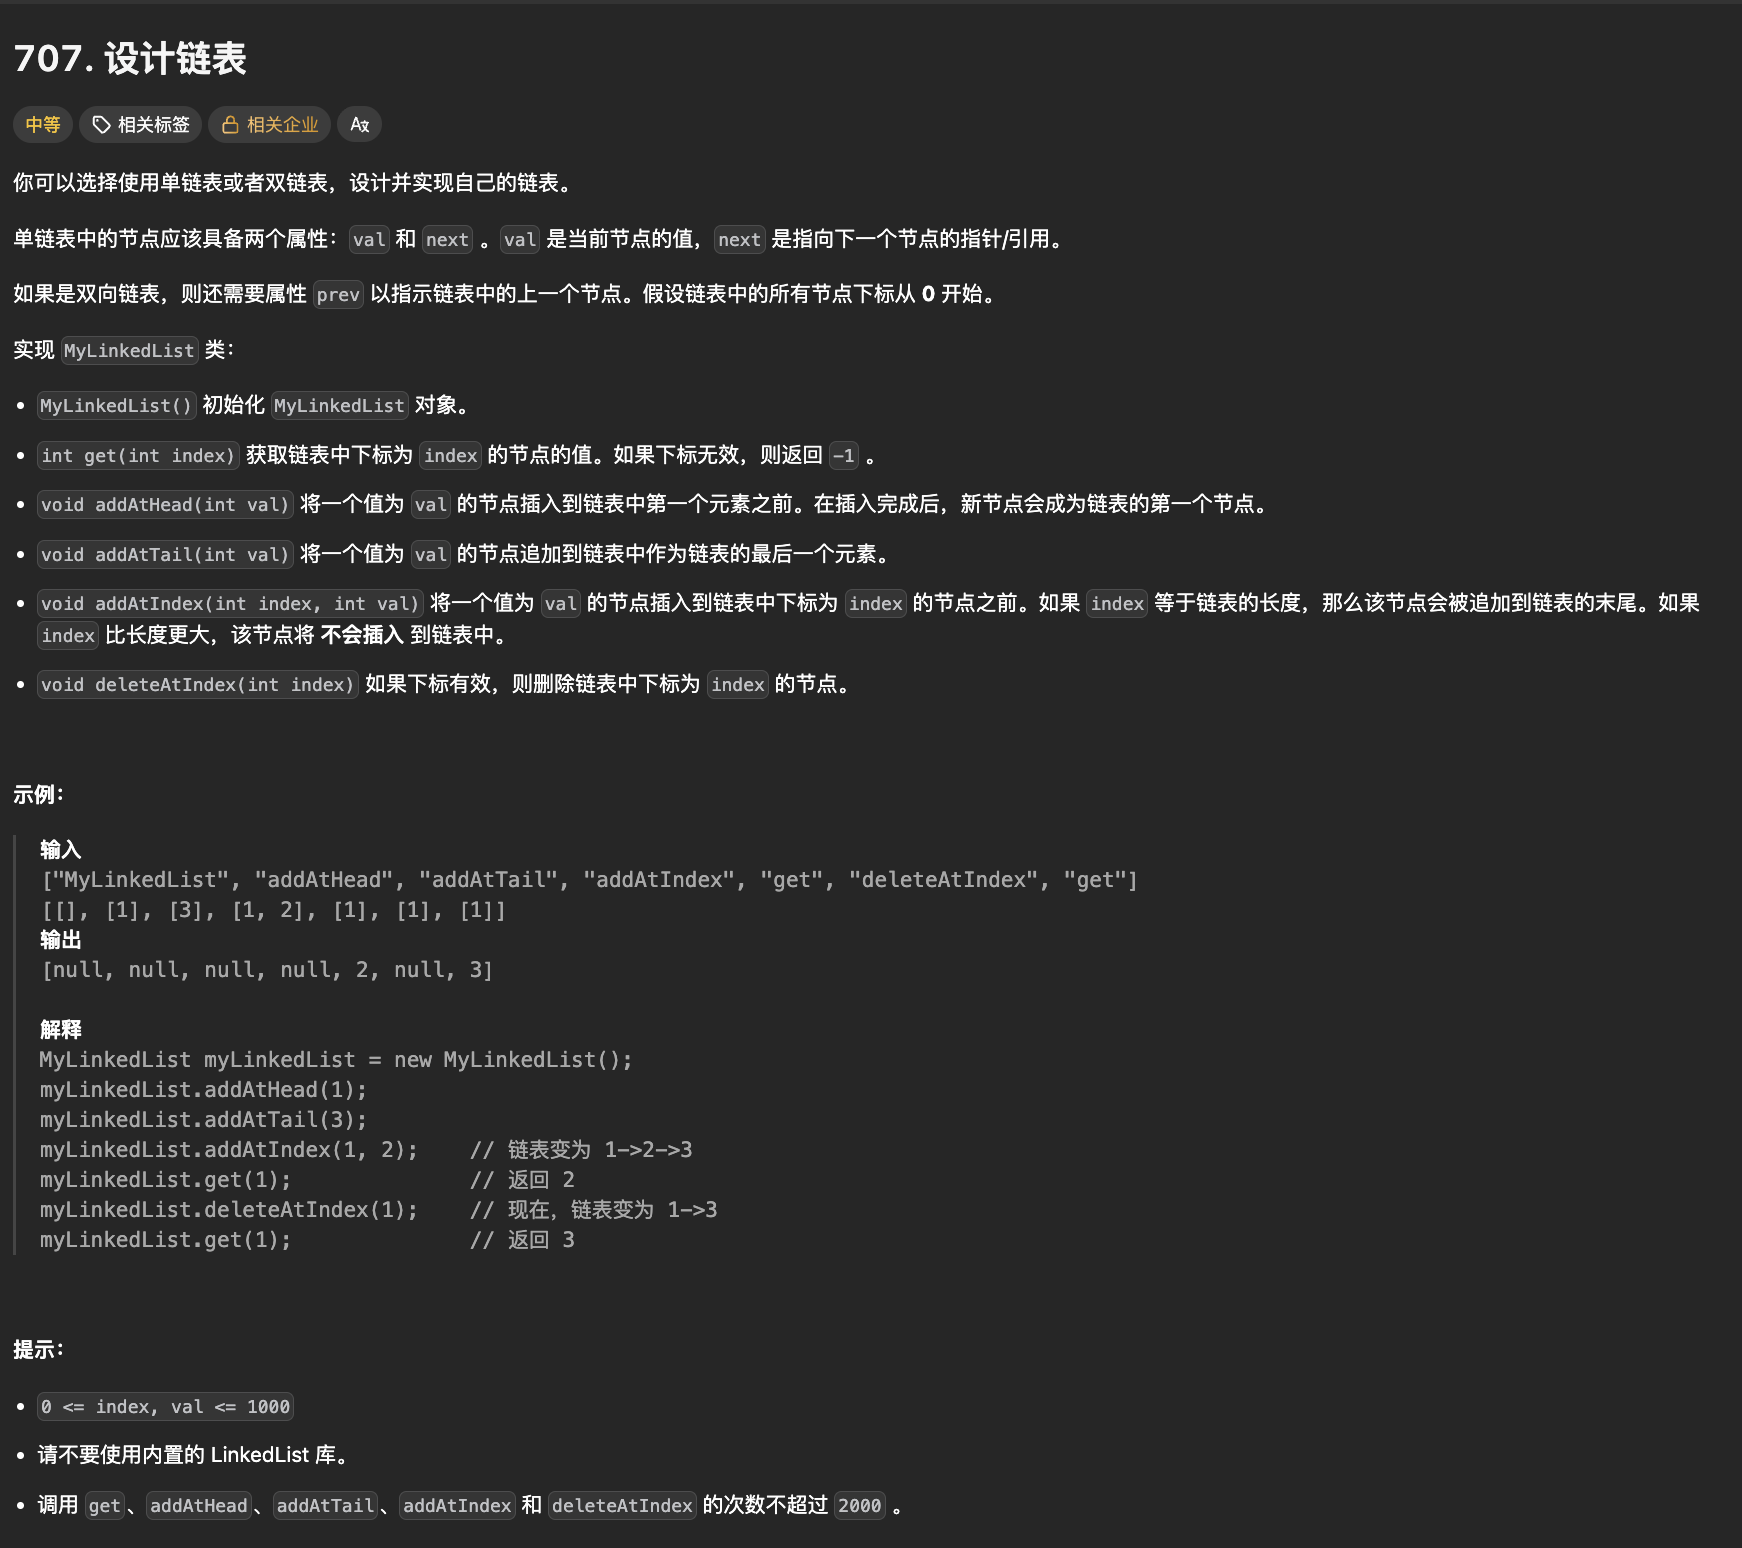

此题覆盖了基本链表的常见操作：
- 获取第 n 个节点的值
- 头部插入节点
- 尾部插入节点
- 第 n 个节点前插入节点
- 删除第 n 个节点

In [ ]:
#（版本一）单链表法
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class MyLinkedList:
    def __init__(self):
        self.dummy_head = ListNode()
        self.size = 0

    def get(self, index: int) -> int:
        if index < 0 or index >= self.size:
            return -1
        
        current = self.dummy_head.next
        for i in range(index):
            current = current.next
            
        return current.val

    def addAtHead(self, val: int) -> None:
        self.dummy_head.next = ListNode(val, self.dummy_head.next)
        self.size += 1

    def addAtTail(self, val: int) -> None:
        current = self.dummy_head
        while current.next:
            current = current.next
        current.next = ListNode(val)
        self.size += 1

    def addAtIndex(self, index: int, val: int) -> None:
        if index < 0 or index > self.size:
            return
        
        current = self.dummy_head
        for i in range(index):
            current = current.next
        current.next = ListNode(val, current.next)
        self.size += 1

    def deleteAtIndex(self, index: int) -> None:
        if index < 0 or index >= self.size:
            return
        
        current = self.dummy_head
        for i in range(index):
            current = current.next
        current.next = current.next.next
        self.size -= 1


# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

In [1]:
#（版本二）双链表法
class ListNode:
    def __init__(self, val=0, prev=None, next=None):
        self.val = val
        self.prev = prev
        self.next = next

class MyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0

    def get(self, index: int) -> int:
        if index < 0 or index >= self.size:
            return -1
        
        if index < self.size // 2:
            current = self.head
            for i in range(index):
                current = current.next
        else:
            current = self.tail
            for i in range(self.size - index - 1):
                current = current.prev
                
        return current.val

    def addAtHead(self, val: int) -> None:
        new_node = ListNode(val, None, self.head)
        if self.head:
            self.head.prev = new_node
        else:
            self.tail = new_node
        self.head = new_node
        self.size += 1

    def addAtTail(self, val: int) -> None:
        new_node = ListNode(val, self.tail, None)
        if self.tail:
            self.tail.next = new_node
        else:
            self.head = new_node
        self.tail = new_node
        self.size += 1

    def addAtIndex(self, index: int, val: int) -> None:
        if index < 0 or index > self.size:
            return
        
        if index == 0:
            self.addAtHead(val)
        elif index == self.size:
            self.addAtTail(val)
        else:
            if index < self.size // 2:
                current = self.head
                for i in range(index - 1):
                    current = current.next
            else:
                current = self.tail
                for i in range(self.size - index):
                    current = current.prev
            new_node = ListNode(val, current, current.next)
            current.next.prev = new_node
            current.next = new_node
            self.size += 1

    def deleteAtIndex(self, index: int) -> None:
        if index < 0 or index >= self.size:
            return
        
        if index == 0:
            self.head = self.head.next
            if self.head:
                self.head.prev = None
            else:
                self.tail = None
        elif index == self.size - 1:
            self.tail = self.tail.prev
            if self.tail:
                self.tail.next = None
            else:
                self.head = None
        else:
            if index < self.size // 2:
                current = self.head
                for i in range(index):
                    current = current.next
            else:
                current = self.tail
                for i in range(self.size - index - 1):
                    current = current.prev
            current.prev.next = current.next
            current.next.prev = current.prev
        self.size -= 1



# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)